In [1]:
pip install requests nibabel numpy scikit-image matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 2.1 MB/s eta 0:00:00m eta 0:00:010:00:010m
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Get the data set of brain section images 
#Attention to Visual Motion fMRI dataset

In [2]:
import requests
images = requests.get('http://www.fil.ion.ucl.ac.uk/spm/download/data/attention/attention.zip')

In [4]:
import zipfile
from io import BytesIO
zipstream = BytesIO(images.content)
zf = zipfile.ZipFile(zipstream)

In [5]:
#After we get the file use BytesIo to read write and seek the files
# The files are in format Analyze.
# The file has two parts a header file .hdr and seperate file for the data itself(.img)



In [6]:
#  We will use nibabel to load the image directly from memory. img.get_data() gets us the 3D data array and once we have the 3 D array we can start plotting.

In [7]:
from nibabel import FileHolder
from nibabel.analyze import AnalyzeImage

header = BytesIO(zf.open('attention/structural/nsM00587_0002.hdr').read())
image = BytesIO(zf.open('attention/structural/nsM00587_0002.img').read())
img = AnalyzeImage.from_file_map({'header': FileHolder(fileobj=header), 'image': FileHolder(fileobj=image)})
arr = img.get_fdata()
arr.shape

(157, 189, 68)

In [8]:
arr  # we can see that it is a 3D array

array([[[35., 38., 38., ...,  0.,  0.,  0.],
        [14., 61., 23., ...,  0.,  0.,  0.],
        [36., 58., 31., ...,  0.,  0.,  0.],
        ...,
        [34., 56., 32., ..., 12., 12., 13.],
        [36., 21., 39., ...,  9., 33., 30.],
        [31., 29., 33., ..., 21., 44., 26.]],

       [[39., 44., 47., ...,  0.,  0.,  0.],
        [19., 28., 37., ...,  0.,  0.,  0.],
        [69., 19., 40., ...,  0.,  0.,  0.],
        ...,
        [26., 37., 29., ..., 13., 19., 27.],
        [34., 35., 45., ..., 11., 36., 18.],
        [41., 12., 32., ..., 13., 41., 31.]],

       [[33., 43., 43., ...,  0.,  0.,  0.],
        [27., 40., 25., ...,  0.,  0.,  0.],
        [50.,  9., 38., ...,  0.,  0.,  0.],
        ...,
        [11., 19., 39., ..., 34., 52., 41.],
        [40., 39., 48., ..., 26., 28.,  7.],
        [38.,  8., 16., ..., 27., 31., 19.]],

       ...,

       [[51., 47., 37., ..., 33., 42., 66.],
        [31., 22., 10., ..., 54., 62., 56.],
        [67., 16., 59., ..., 28., 52., 61.

# Firstly lets do a regular plot of a horizontal slice of our brain:

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

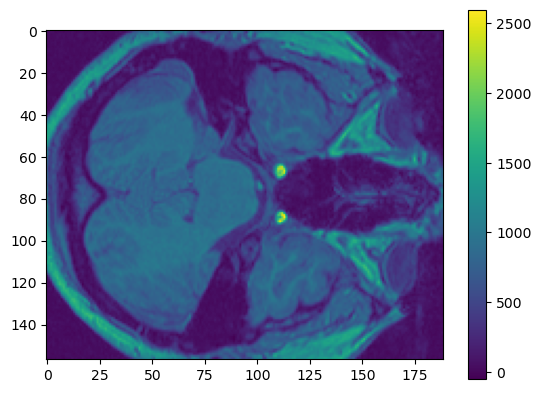

In [10]:
plt.imshow(arr[:,:,5])
plt.colorbar()
plt.plot

In [11]:
# This is just a 2D visual angle of the brain section and we can see that the colorbar ie the color range is notmore than 1500 (no light green and yellow color)

# Confirm the color bar by ploting histogram

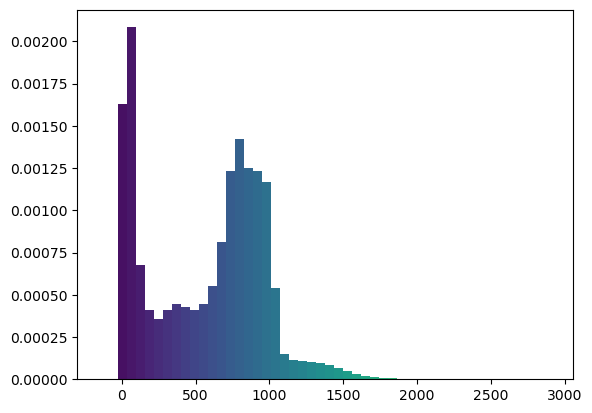

In [13]:
import numpy as np
from matplotlib import cm

def normalize(arr):
    arr_min = np.min(arr)    # Normalization to bring the elements in the array to same scale
    return (arr-arr_min)/(np.max(arr)-arr_min)

def show_histogram(values):
    n, bins, patches = plt.hist(values.reshape(-1), 50, density=True)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])

    for c, p in zip(normalize(bin_centers), patches):
        plt.setp(p, 'facecolor', cm.viridis(c))

    plt.show()
    
show_histogram(arr)

In [15]:
arr

array([[[35., 38., 38., ...,  0.,  0.,  0.],
        [14., 61., 23., ...,  0.,  0.,  0.],
        [36., 58., 31., ...,  0.,  0.,  0.],
        ...,
        [34., 56., 32., ..., 12., 12., 13.],
        [36., 21., 39., ...,  9., 33., 30.],
        [31., 29., 33., ..., 21., 44., 26.]],

       [[39., 44., 47., ...,  0.,  0.,  0.],
        [19., 28., 37., ...,  0.,  0.,  0.],
        [69., 19., 40., ...,  0.,  0.,  0.],
        ...,
        [26., 37., 29., ..., 13., 19., 27.],
        [34., 35., 45., ..., 11., 36., 18.],
        [41., 12., 32., ..., 13., 41., 31.]],

       [[33., 43., 43., ...,  0.,  0.,  0.],
        [27., 40., 25., ...,  0.,  0.,  0.],
        [50.,  9., 38., ...,  0.,  0.,  0.],
        ...,
        [11., 19., 39., ..., 34., 52., 41.],
        [40., 39., 48., ..., 26., 28.,  7.],
        [38.,  8., 16., ..., 27., 31., 19.]],

       ...,

       [[51., 47., 37., ..., 33., 42., 66.],
        [31., 22., 10., ..., 54., 62., 56.],
        [67., 16., 59., ..., 28., 52., 61.

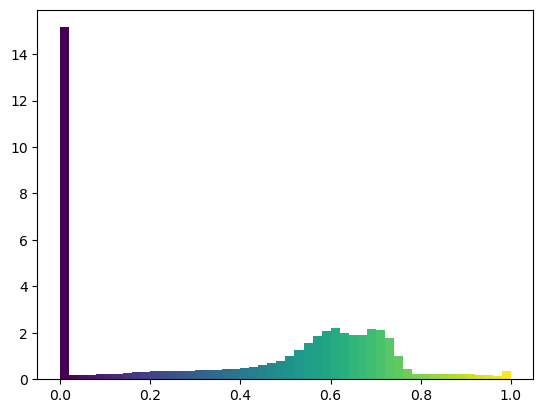

In [14]:
def scale_by(arr, fac):
    mean = np.mean(arr)
    return (arr-mean)*fac + mean

transformed = np.clip(scale_by(np.clip(normalize(arr)-0.1, 0, 1)**0.4, 2)-0.1, 0, 1)
show_histogram(transformed)

In [17]:
# We can see that the color scheme peaks at purplee

# Start plotting

In [18]:
# Trying to plot simple voxels before actually plotting our brain images

/tmp/ipykernel_389531/3703384584.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') #Get the current Axes instance on the current figure matching the given keyword args, or create one.


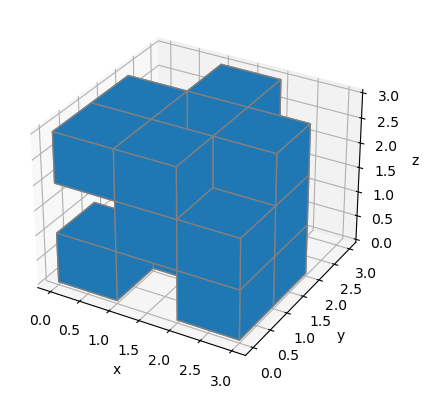

In [20]:
from mpl_toolkits.mplot3d import Axes3D
def make_ax(grid=False): # make the 3D plot space
    fig = plt.figure()
    ax = fig.gca(projection='3d') #Get the current Axes instance on the current figure matching the given keyword args, or create one.
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.grid(grid) # makes the grid
    return ax

filled = np.array([
    [[1, 0, 1], [0, 0, 1], [0, 1, 0]],
    [[0, 1, 1], [1, 0, 0], [1, 0, 1]],
    [[1, 1, 0], [1, 1, 1], [0, 0, 0]]
])   #The 3D array that is nothing but a simple square is is set to fill out the voxels

ax = make_ax(True) # sets that the position should be filled
ax.voxels(filled, edgecolors='gray', shade=False)  # module
plt.show()

In [21]:
#Here, the filled array tells matplotlib which voxels to fill in. 
#Any truthy value (you’ll most likely use True or 1) in the array means that the voxel in the corresponding poxition should be filled. 
#It’s in x-major, z-minor order, so the first [1, 0, 1] block, for instance, means “fill in the blocks at (x, y, z)=(0, 0, 0) don’t fill the one at (0, 0, 1), and fill the one at (0, 0, 2)”.

/tmp/ipykernel_389531/3703384584.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') #Get the current Axes instance on the current figure matching the given keyword args, or create one.


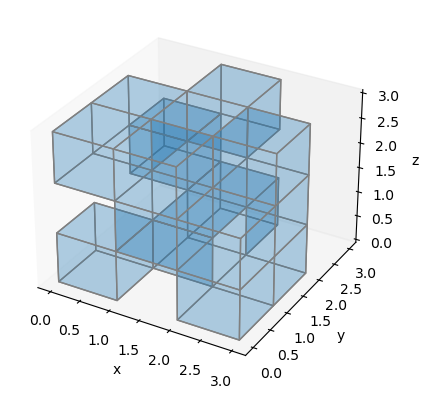

In [22]:
ax = make_ax()
ax.voxels(filled, facecolors='#1f77b430', edgecolors='gray', shade=False)   #this option makes the array semitransparent
plt.show()

In [23]:
# Problem : when we try to plot a large cube the other voxels are not clearly differentiated

/tmp/ipykernel_389531/3703384584.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') #Get the current Axes instance on the current figure matching the given keyword args, or create one.


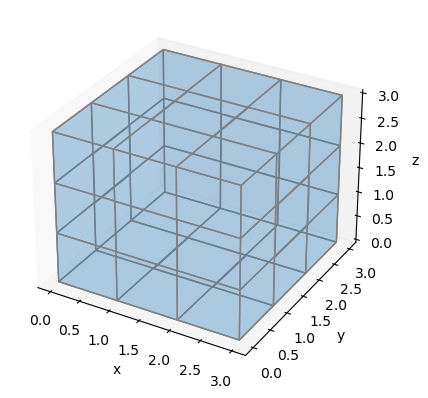

In [24]:
ax = make_ax()
ax.voxels(np.ones((3, 3, 3)), facecolors='#1f77b430', edgecolors='gray', shade=False)
plt.show()

/tmp/ipykernel_389531/3703384584.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') #Get the current Axes instance on the current figure matching the given keyword args, or create one.


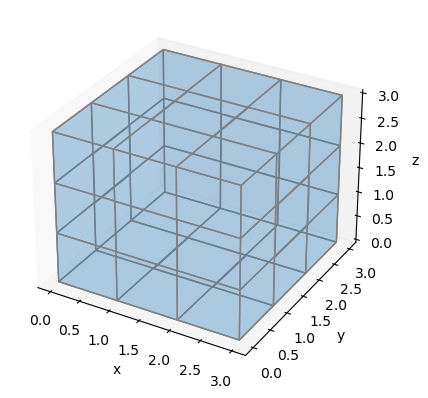

In [25]:
#Only the faces and edges on the sides are rendered. This seems okay, 
#but what if we want to color the middle voxel red, it’s not going to show:
ax = make_ax()
colors = np.array([[['#1f77b430']*3]*3]*3)
colors[1,1,1] = '#ff0000ff'
ax.voxels(np.ones((3, 3, 3)), facecolors=colors, edgecolor='gray', shade=False)
plt.show()

In [26]:
#To solve this problem, we add extra voxels in between the blocks. 
#we can define a function that takes in our filled array(with [1 ,0 ,1] type values) and return a double size array with extra space so that voxels are visible

In [27]:
def explode(data):
    shape_arr = np.array(data.shape)
    size = shape_arr[:3]*2 - 1
    exploded = np.zeros(np.concatenate([size, shape_arr[3:]]), dtype=data.dtype)
    exploded[::2, ::2, ::2] = data  # it supports a 3D array
    return exploded

In [28]:
# lets plot our filled aarray now!

/tmp/ipykernel_389531/3703384584.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') #Get the current Axes instance on the current figure matching the given keyword args, or create one.


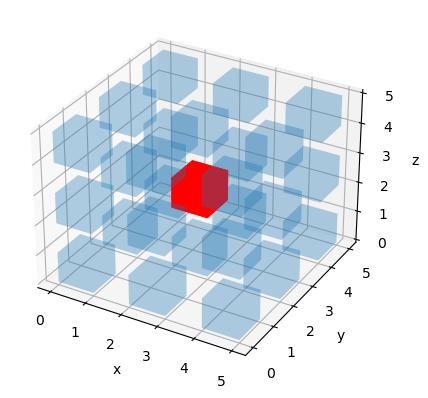

In [29]:
ax = make_ax(True)
colors = np.array([[['#1f77b430']*3]*3]*3)
colors[1,1,1] = '#ff0000ff'
colors = explode(colors)
filled = explode(np.ones((3, 3, 3)))
ax.voxels(filled, facecolors=colors, shade=False)
plt.show()

In [30]:
# We donot want gaps between the voxels but want clear differentiation in terms of edges

In [31]:
#  We can extend the middle block by incrementing y for all blocks in the middle and back columns:

/tmp/ipykernel_389531/3703384584.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') #Get the current Axes instance on the current figure matching the given keyword args, or create one.


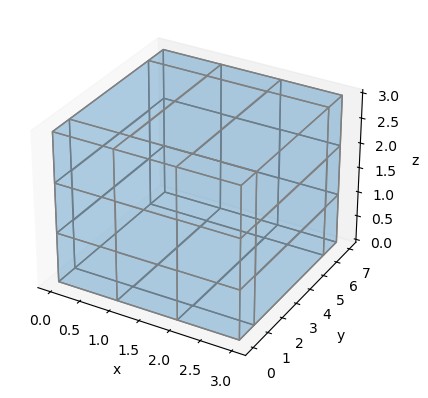

In [32]:
ax = make_ax()

filled = np.ones((3, 3, 3))
x, y, z = np.indices(np.array(filled.shape) + 1)  # incremented the coordinates shape by one(inherently supported by the numpy module)
y[:,2:,:] += 4

ax.voxels(x, y, z, filled, facecolors='#1f77b430', edgecolor='gray', shade=False)
plt.show()

In [33]:
# We can also change the coordinate of a given point to extend it

/tmp/ipykernel_389531/3703384584.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') #Get the current Axes instance on the current figure matching the given keyword args, or create one.


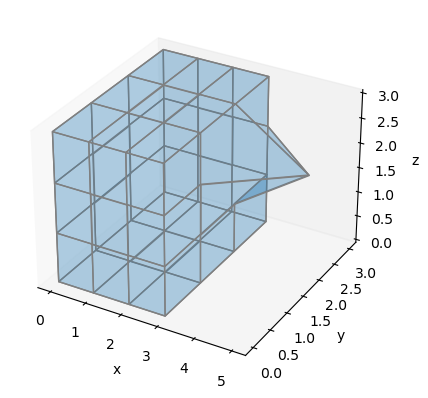

In [34]:
ax = make_ax()

filled = np.ones((3, 3, 3))
x, y, z = np.indices(np.array(filled.shape) + 1)
x[3, 2, 2] = 5   #coordinate to be visualized

ax.voxels(x, y, z, filled, facecolors='#1f77b430', edgecolor='gray', shade=False)
plt.show()

# Putting all this together, we can draw over all the inserted voxels we just added by making all of the original voxels twice as large

/tmp/ipykernel_389531/3703384584.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') #Get the current Axes instance on the current figure matching the given keyword args, or create one.


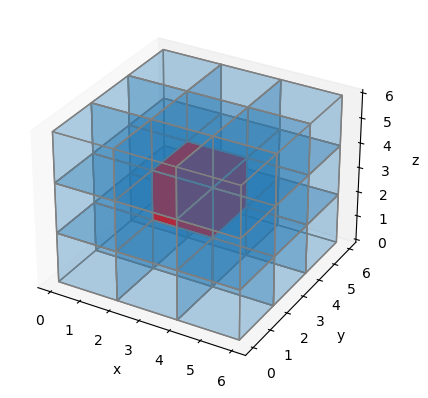

In [35]:
def expand_coordinates(indices):
    x, y, z = indices
    x[1::2, :, :] += 1
    y[:, 1::2, :] += 1
    z[:, :, 1::2] += 1
    return x, y, z

ax = make_ax()
colors = np.array([[['#1f77b430']*3]*3]*3) # multiplies color in each layer of 3D
colors[1,1,1] = '#ff0000ff'
colors = explode(colors)
filled = explode(np.ones((3, 3, 3)))
x, y, z = expand_coordinates(np.indices(np.array(filled.shape) + 1)) # expands the coordinates with expanded shape
ax.voxels(x, y, z, filled, facecolors=colors, edgecolors='gray', shade=False)
plt.show()

# Plotting

In [37]:
#Resizing the image

In [38]:
IMG_DIM = 50

from skimage.transform import resize
resized = resize(transformed, (IMG_DIM, IMG_DIM, IMG_DIM), mode='constant')

In [73]:
def explode(data):   # This function doubles the voxels 
    shape_arr = np.array(data.shape)
    size = shape_arr[:3]*2 - 1
    exploded = np.zeros(np.concatenate([size, shape_arr[3:]]), dtype=data.dtype)
    exploded[::2, ::2, ::2] = data
    return exploded

def expand_coordinates(indices): # colors the central element and plots it differently with expanded arrays
    x, y, z = indices
    x[1::2, :, :] += 1
    y[:, 1::2, :] += 1
    z[:, :, 1::2] += 1
    return x, y, z

def plot_cube(cube, angle=320):
    cube = normalize(cube)
    
    facecolors = cm.viridis(cube)   #The color scheme:The Viridis palette was implemented using blues and yellow sequences
    facecolors[:,:,:,-1] = cube
    facecolors = explode(facecolors)
    
    filled = facecolors[:,:,:,-1] != 0
    x, y, z = expand_coordinates(np.indices(np.array(filled.shape) + 1))

    fig = plt.figure(figsize=(30/2.54, 30/2.54))
    ax = fig.gca(projection='3d')
    ax.view_init(30, angle)
    ax.set_xlim(right=IMG_DIM*2)
    ax.set_ylim(top=IMG_DIM*2)
    ax.set_zlim(top=IMG_DIM*2)
    
    ax.voxels(x, y, z, filled, facecolors=facecolors, shade=False)   #ax.set_axis_off() to remove the background and axis ticks.
    
    plt.show()

/tmp/ipykernel_389531/3292714515.py:26: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


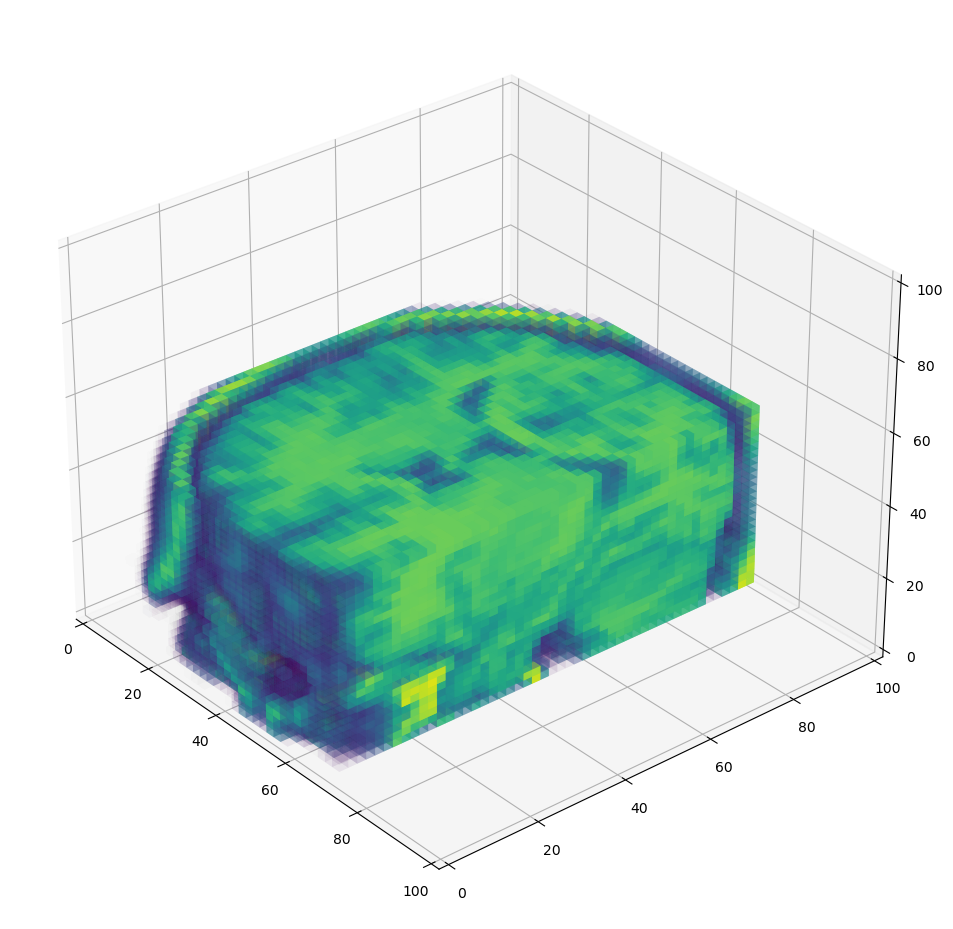

In [52]:
plot_cube(resized[:35,::-1,:25])

/tmp/ipykernel_389531/3292714515.py:26: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


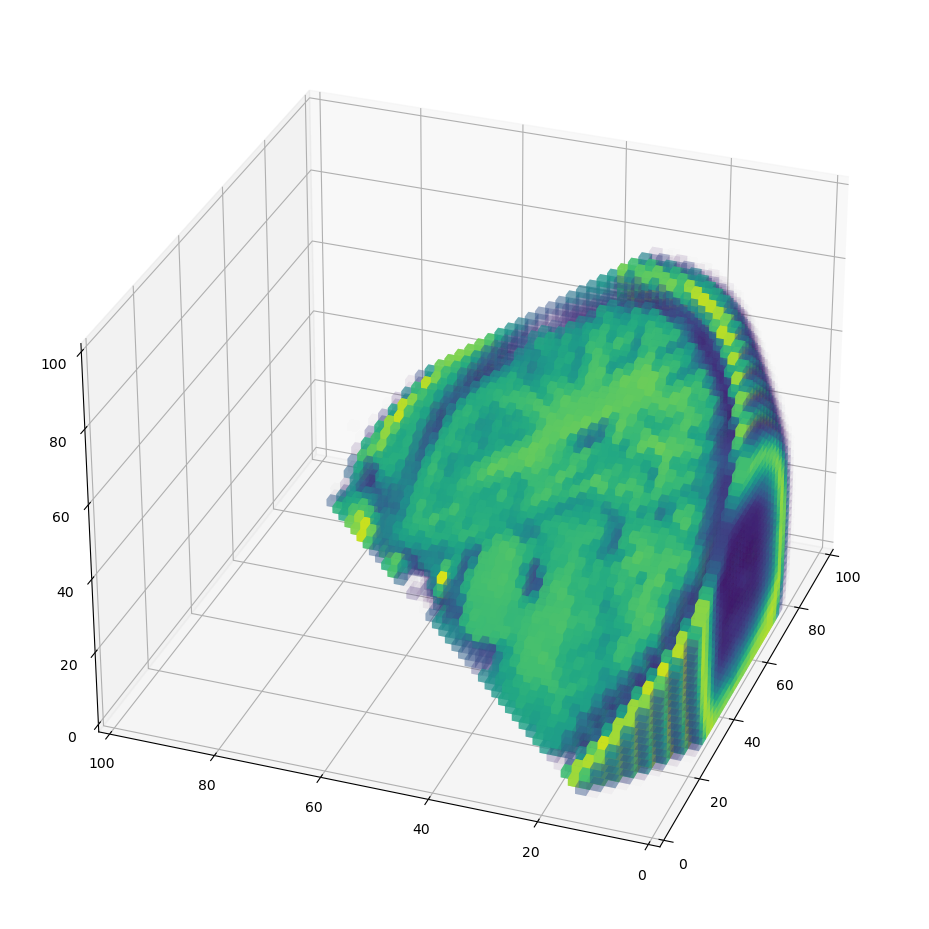

In [53]:
#A view from the back, cutting through in diagonal:

cube = np.copy(resized)

for x in range(0, IMG_DIM):
    for y in range(0, IMG_DIM):
        for z in range(max(x-y+5, 0), IMG_DIM):
            cube[x, y, z] = 0
plot_cube(cube, angle=200)

In [ ]:
plot_cube(resized[:35,::-1,:25])

In [ ]:
plot_cube(resized[2:,:-1,:])

/tmp/ipykernel_389531/3292714515.py:26: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


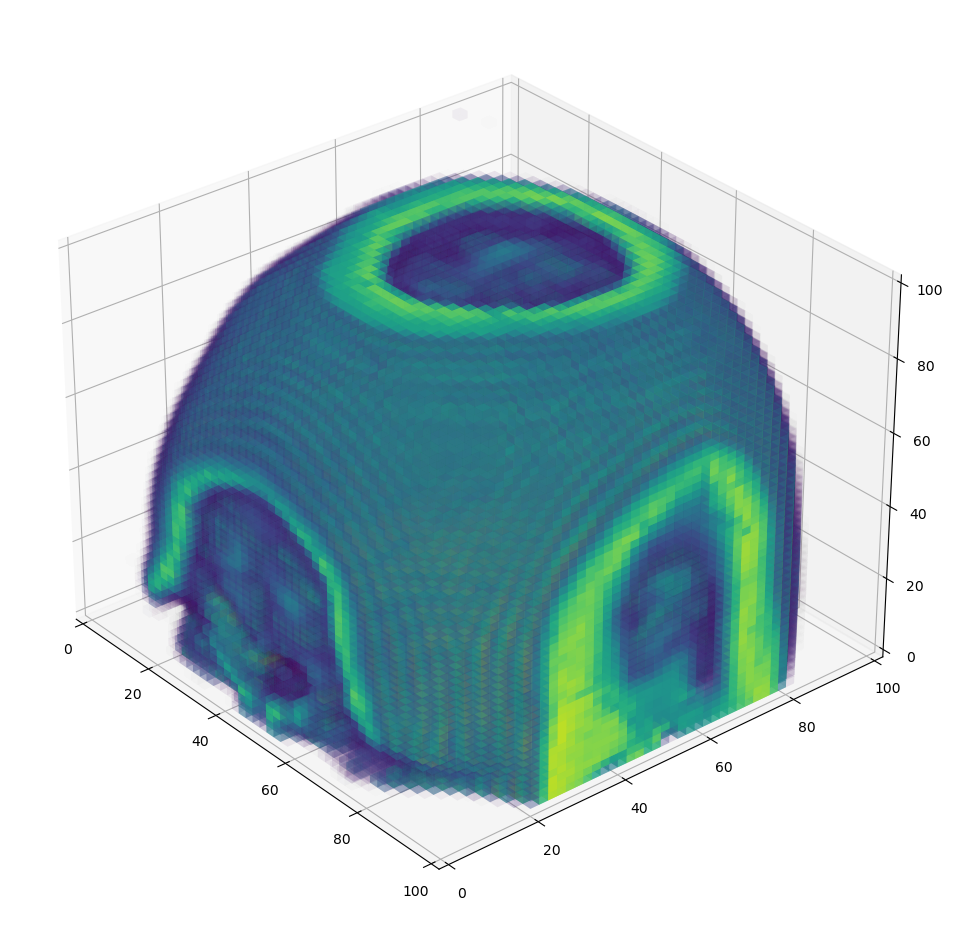

In [55]:
#And a full view, where we can see the nasal cavity and make out the eye sockets at the very bottom:
plot_cube(resized[:35,::-1,:25])
plot_cube(resized[:,::-1,:])

/tmp/ipykernel_389531/3292714515.py:26: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


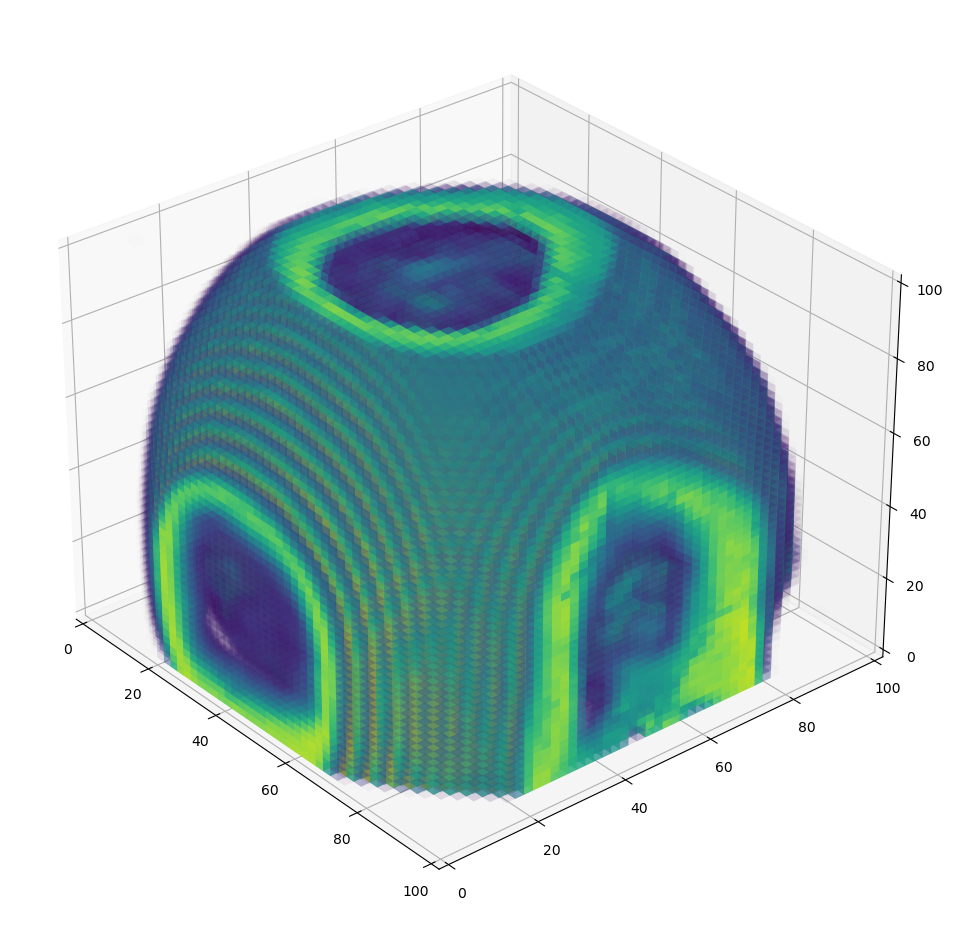

In [61]:
plot_cube(resized[2:,:-1,:])

/tmp/ipykernel_389531/3292714515.py:26: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


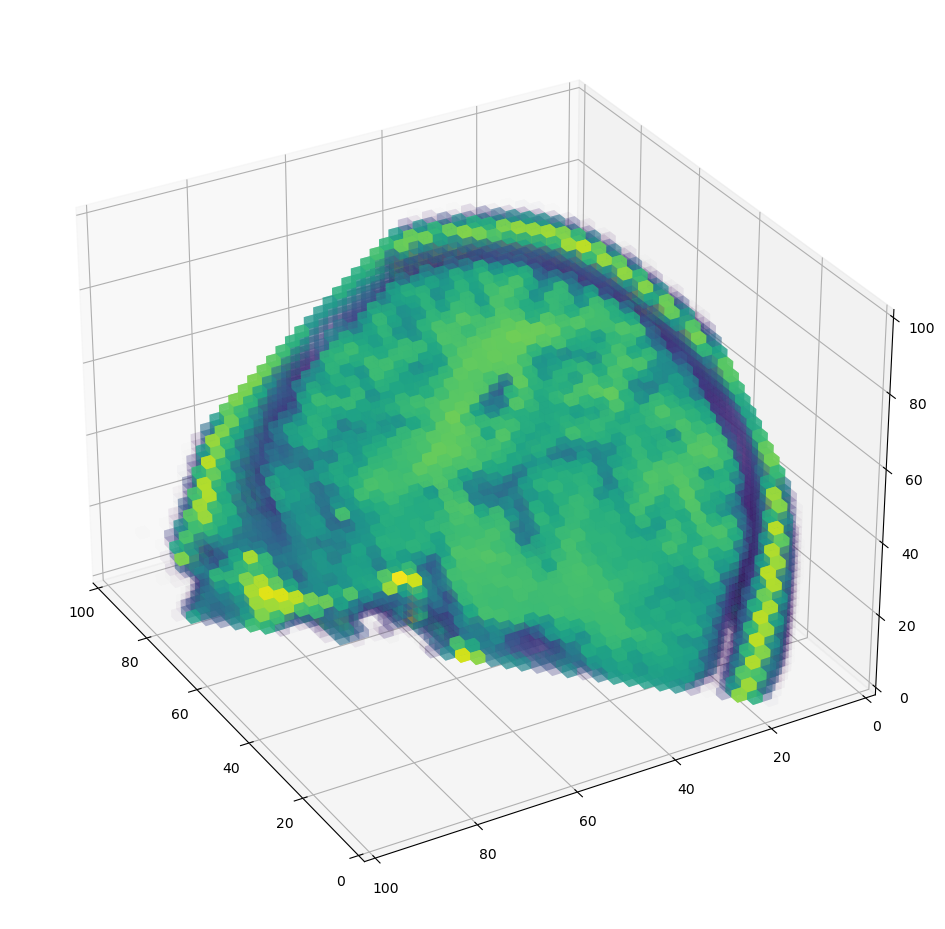

In [62]:
cube = np.copy(resized)

for x in range(0, IMG_DIM):
    for y in range(0, IMG_DIM):
        for z in range(max(x-y+8, 0), IMG_DIM):
            cube[x, y, z] = 0
plot_cube(cube, angle=150)

/tmp/ipykernel_389531/3292714515.py:26: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


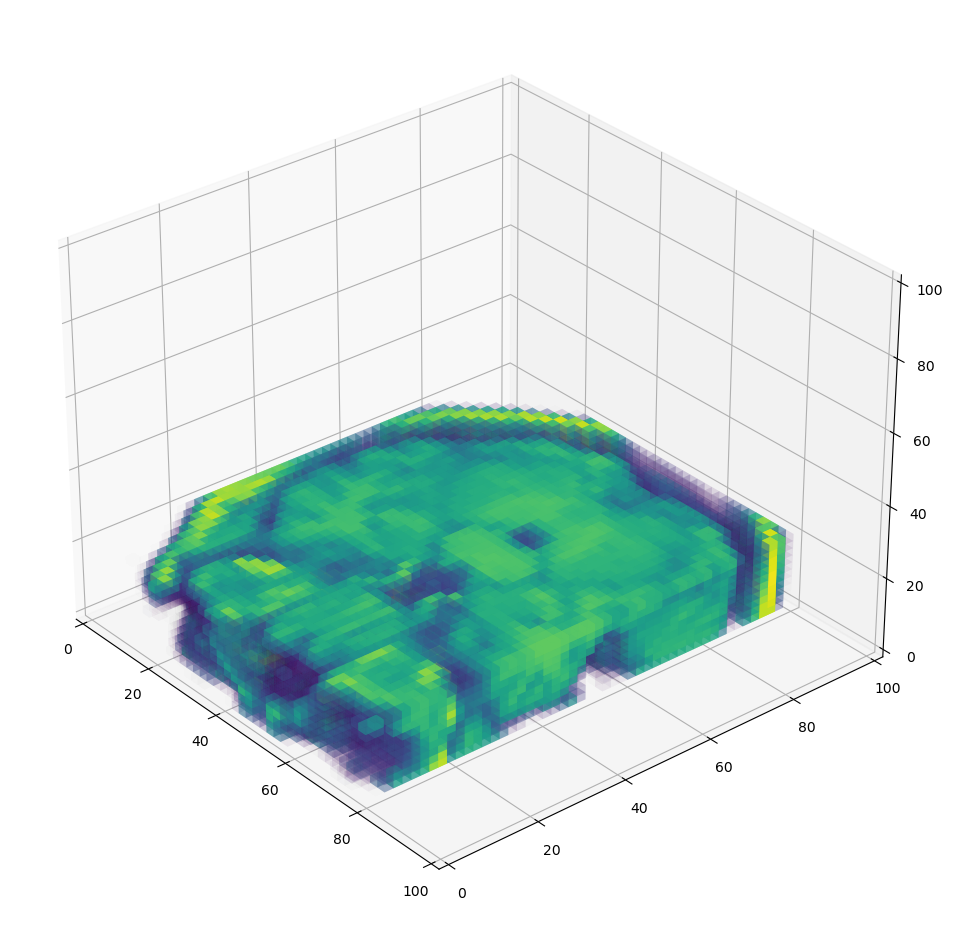

In [74]:
plot_cube(resized[:40,::-1,:10])

/tmp/ipykernel_389531/3292714515.py:26: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


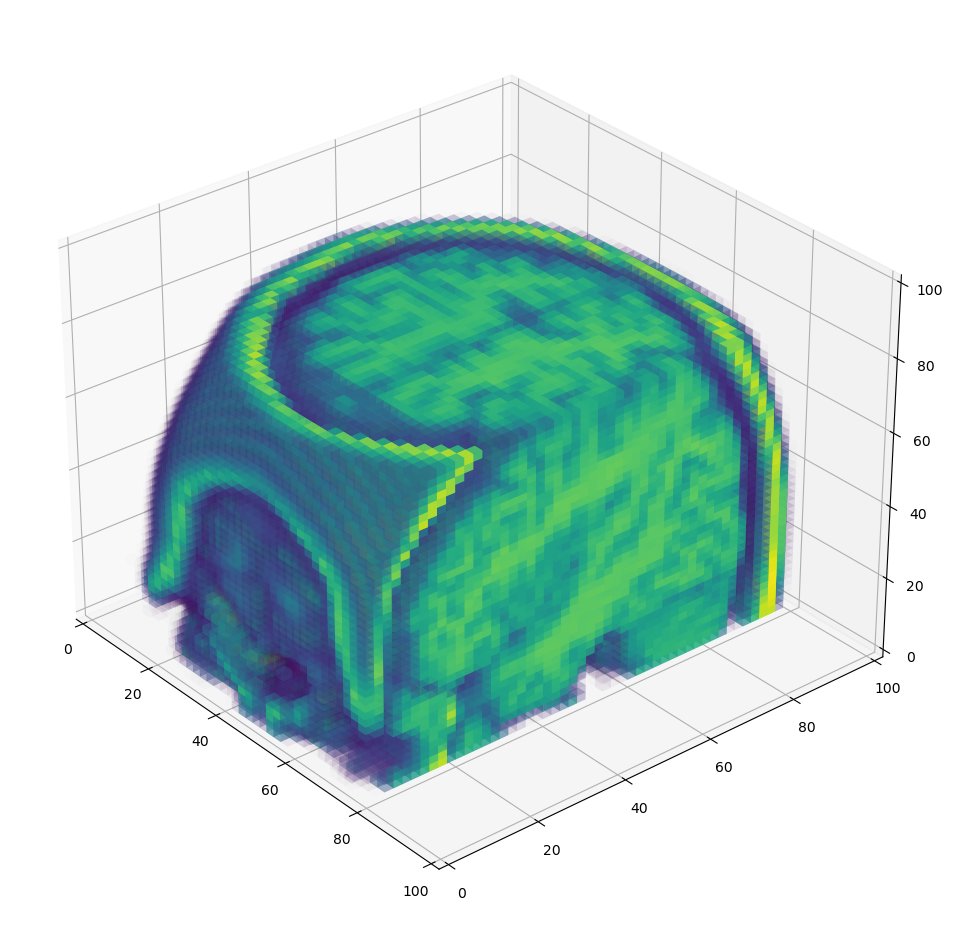

In [79]:
plot_cube(resized[:40,::-1,:40])